## This notebook is on NLP. Below are tasks performed in this notebook
1.	Sentence and Word Tokenization
2.	Plot the frequency distribution of words
3.	Remove noise in the text by performing different noise removal techniques       like stopwords removal, stemming, lemmatization and pos tagging.




## Import the required libraries

In [0]:
import nltk
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
import spacy as sp
import string	

In [0]:
given_sentence = "Hello Mr. Smith, how are you doing today? The weather is great, and city is awesome. The sky is pinkish-blue. You shouldn't eat cardboard"

## Word and sentence tokenization

In [0]:
sent_tokens = sent_tokenize(given_sentence)
word_tokens = word_tokenize(given_sentence)

In [4]:
print("Sentence tokens: ", sent_tokens)

Sentence tokens:  ['Hello Mr. Smith, how are you doing today?', 'The weather is great, and city is awesome.', 'The sky is pinkish-blue.', "You shouldn't eat cardboard"]


In [5]:
print("Word tokens: ",word_tokens)

Word tokens:  ['Hello', 'Mr.', 'Smith', ',', 'how', 'are', 'you', 'doing', 'today', '?', 'The', 'weather', 'is', 'great', ',', 'and', 'city', 'is', 'awesome', '.', 'The', 'sky', 'is', 'pinkish-blue', '.', 'You', 'should', "n't", 'eat', 'cardboard']


In [6]:
## word tokenization with spacy. using nltk word tokenizer is not seperating pinkish-blue.
corpus = sp.load('en_core_web_sm')
sp_doc = corpus(given_sentence)
word_tokens = [str(word_token) for word_token in sp_doc]
print(word_tokens)

['Hello', 'Mr.', 'Smith', ',', 'how', 'are', 'you', 'doing', 'today', '?', 'The', 'weather', 'is', 'great', ',', 'and', 'city', 'is', 'awesome', '.', 'The', 'sky', 'is', 'pinkish', '-', 'blue', '.', 'You', 'should', "n't", 'eat', 'cardboard']


## Plotting frequency distribution of words

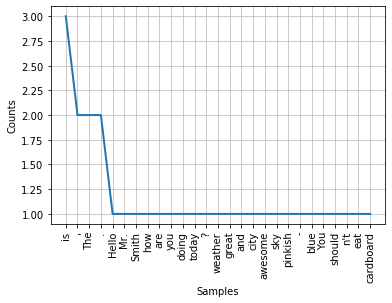

In [7]:
from nltk import FreqDist
fd = nltk.FreqDist(word_tokens)
fd.plot(30,cumulative=False)

# Removing stop words and punctuations

In [0]:
table = str.maketrans('', '', string.punctuation)
# Removing punctuation from the words
stripped_words = [word.translate(table) for word in word_tokens]
# remove all tokens that are not alphabetic
words = [word for word in word_tokens if word.isalpha()]
english_stopwords = stopwords.words('english')
without_stopwords = [ given_word for given_word in words if not given_word.lower() in english_stopwords]

In [9]:
print("Words after removing punctuations and english stop words are: ")
print(without_stopwords)

Words after removing punctuations and english stop words are: 
['Hello', 'Smith', 'today', 'weather', 'great', 'city', 'awesome', 'sky', 'pinkish', 'blue', 'eat', 'cardboard']


## Stemming: 
##### It removes suffices, like “ing”, “ly”, “s”, etc. by a simple rule-based approach
##### using Porter stemming here

In [0]:
porter = PorterStemmer()
words_after_stemming = [porter.stem(word) for word in without_stopwords]

In [11]:
print("Words after stemming are: ")
print(words_after_stemming)


Words after stemming are: 
['hello', 'smith', 'today', 'weather', 'great', 'citi', 'awesom', 'sky', 'pinkish', 'blue', 'eat', 'cardboard']


## Pos(Parts of speech) Tagging. Printing the dictionary with word and POS tag

In [12]:
# Here i am passing the words remoing stop words and punctuations. I am not passing the words after stemming
pos_dict = nltk.pos_tag(without_stopwords) 
print(pos_dict)

[('Hello', 'NNP'), ('Smith', 'NNP'), ('today', 'NN'), ('weather', 'RB'), ('great', 'JJ'), ('city', 'NN'), ('awesome', 'VBP'), ('sky', 'JJ'), ('pinkish', 'JJ'), ('blue', 'NN'), ('eat', 'NN'), ('cardboard', 'NN')]


## Lemmatization : 
#### reduce each word to its root or base.

In [0]:
from nltk.stem import wordnet
from nltk.stem import WordNetLemmatizer
lemmetizer = WordNetLemmatizer
after_lemmetization = [lemmetizer.lemmatize(pos_val[1], pos_val[0]) for pos_val in pos_dict]

In [14]:
print("Words after Lemmatization are: ")
print(after_lemmetization)

Words after Lemmatization are: 
['Hello', 'Smith', 'today', 'weather', 'great', 'city', 'awesome', 'sky', 'pinkish', 'blue', 'eat', 'cardboard']
